In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [2]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_5s_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_5s_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=128, CH = CH)

In [3]:
len(train_loader), len(val_loader), len(test_loader)

(321, 104, 104)

In [4]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 1, 100, 5])
torch.Size([128, 1])
128
128
128


date:180323, rec:003, time:4714.0


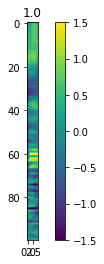

date:180325, rec:004, time:374.0


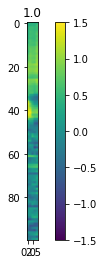

date:180323, rec:004, time:5001.0


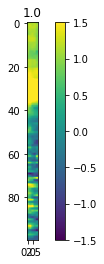

date:180325, rec:006, time:1146.0


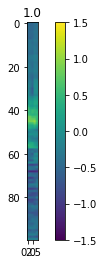

date:180325, rec:001, time:3727.0


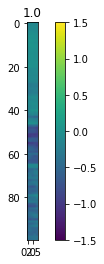

date:180401, rec:001, time:1197.0


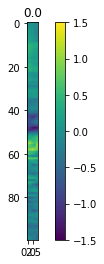

date:180325, rec:009, time:1337.0


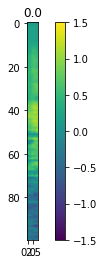

date:180325, rec:001, time:537.0


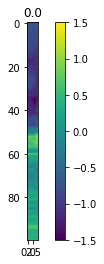

date:180401, rec:001, time:5329.0


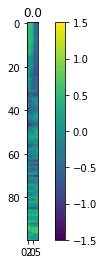

date:180323, rec:005, time:4130.0


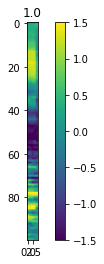

date:180322, rec:007, time:4077.0


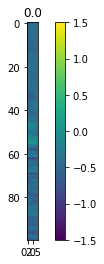

date:180401, rec:001, time:5314.0


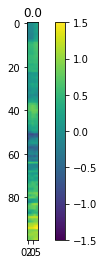

date:180325, rec:007, time:4325.0


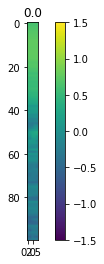

date:180325, rec:004, time:4591.0


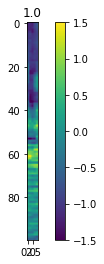

date:180325, rec:002, time:2602.0


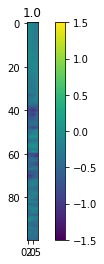

date:180401, rec:002, time:6411.0


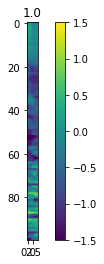

date:180322, rec:005, time:267.0


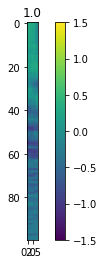

date:180323, rec:002, time:872.0


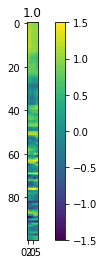

date:180325, rec:001, time:892.0


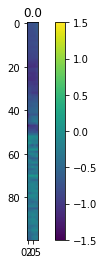

date:180322, rec:005, time:2429.0


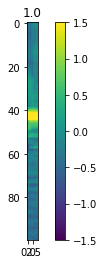

date:180324, rec:001, time:5626.0


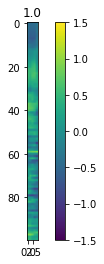

date:180324, rec:001, time:1759.0


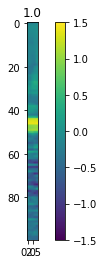

date:180322, rec:004, time:6025.0


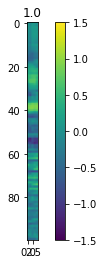

date:180324, rec:008, time:6266.0


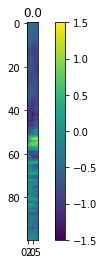

date:180325, rec:002, time:282.0


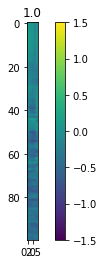

date:180325, rec:009, time:6462.0


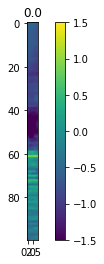

date:180325, rec:004, time:2305.0


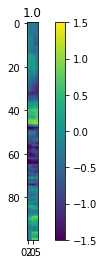

date:180324, rec:001, time:572.0


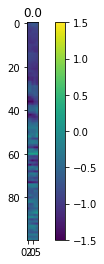

date:180325, rec:007, time:4685.0


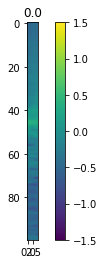

date:180324, rec:008, time:4726.0


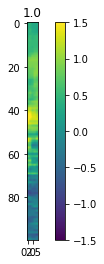

date:180401, rec:001, time:1417.0


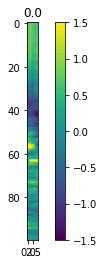

date:180324, rec:008, time:855.0


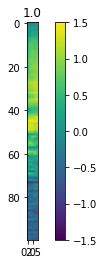

date:180325, rec:003, time:4095.0


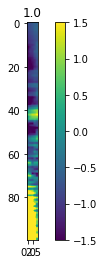

date:180322, rec:003, time:1680.0


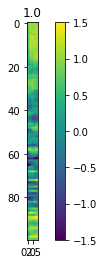

date:180322, rec:003, time:5472.0


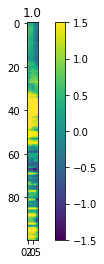

date:180324, rec:003, time:5059.0


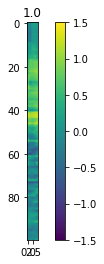

date:180322, rec:007, time:3361.0


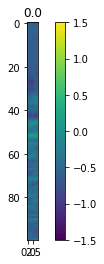

date:180324, rec:008, time:2550.0


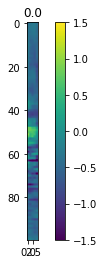

date:180324, rec:009, time:1084.0


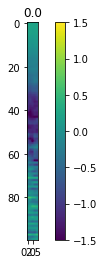

date:180324, rec:008, time:3015.0


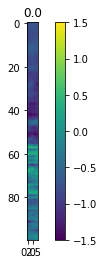

date:180325, rec:001, time:1157.0


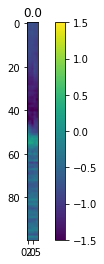

date:180325, rec:004, time:835.0


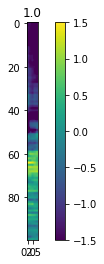

date:180325, rec:007, time:4835.0


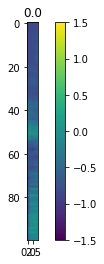

date:180325, rec:005, time:2171.0


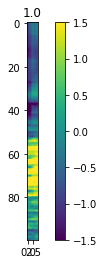

date:180322, rec:005, time:227.0


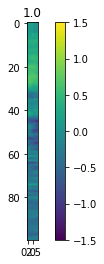

date:180322, rec:007, time:4372.0


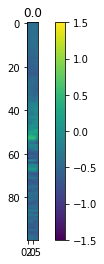

date:180325, rec:009, time:4806.0


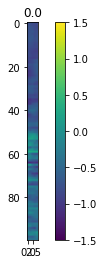

date:180323, rec:007, time:6433.0


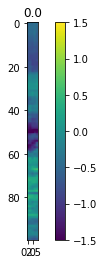

date:180325, rec:001, time:1697.0


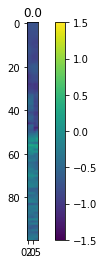

date:180325, rec:009, time:972.0


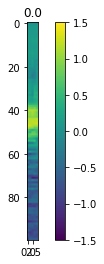

date:180324, rec:009, time:797.0


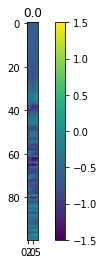

date:180401, rec:001, time:477.0


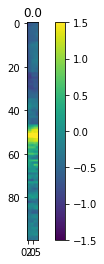

date:180325, rec:005, time:1006.0


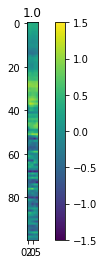

date:180324, rec:008, time:5196.0


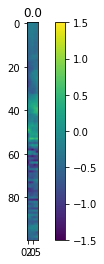

date:180323, rec:001, time:747.0


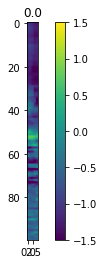

date:180323, rec:004, time:5381.0


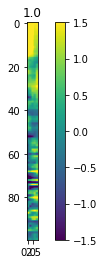

date:180323, rec:003, time:2803.0


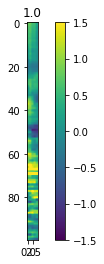

date:180325, rec:009, time:1587.0


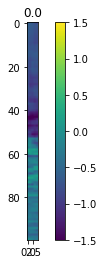

date:180325, rec:009, time:392.0


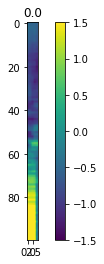

date:180401, rec:001, time:792.0


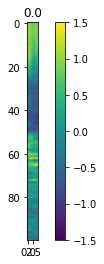

date:180324, rec:008, time:6711.0


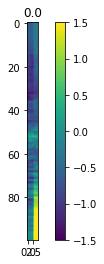

date:180325, rec:001, time:1872.0


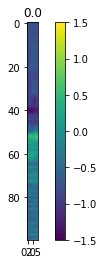

date:180323, rec:002, time:4453.0


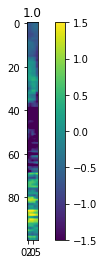

date:180323, rec:007, time:6708.0


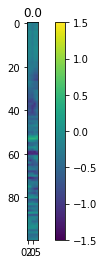

date:180324, rec:003, time:1183.0


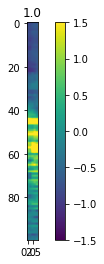

date:180322, rec:005, time:950.0


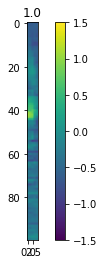

date:180323, rec:007, time:5598.0


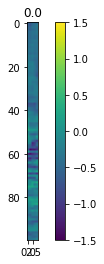

date:180323, rec:003, time:152.0


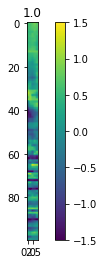

date:180401, rec:001, time:97.0


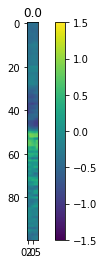

date:180324, rec:006, time:3451.0


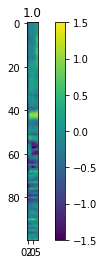

date:180324, rec:004, time:2566.0


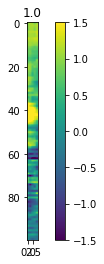

date:180325, rec:004, time:5809.0


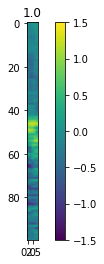

date:180325, rec:009, time:1167.0


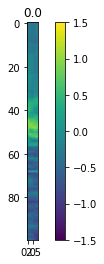

date:180325, rec:007, time:6390.0


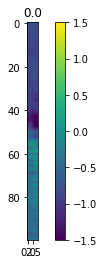

date:180325, rec:004, time:6004.0


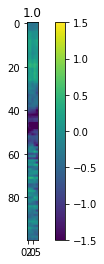

date:180322, rec:003, time:6858.0


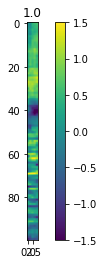

date:180323, rec:007, time:6033.0


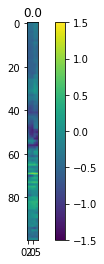

date:180324, rec:009, time:1784.0


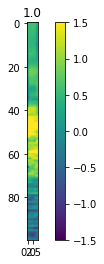

date:180325, rec:006, time:278.0


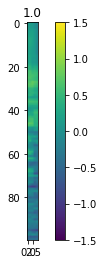

date:180325, rec:005, time:4385.0


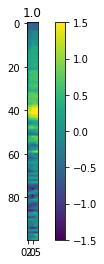

date:180323, rec:007, time:6348.0


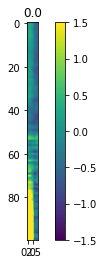

date:180325, rec:007, time:1002.0


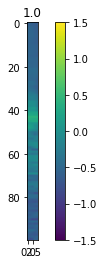

date:180324, rec:006, time:6020.0


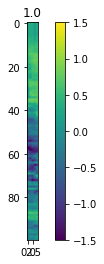

date:180322, rec:007, time:2155.0


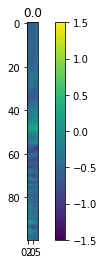

date:180401, rec:001, time:1132.0


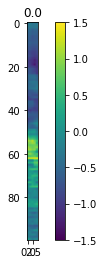

date:180401, rec:002, time:3638.0


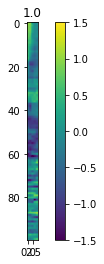

date:180401, rec:001, time:6640.0


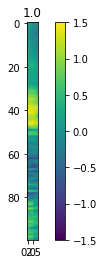

date:180324, rec:008, time:5921.0


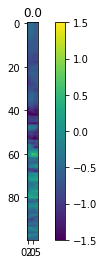

date:180325, rec:001, time:1547.0


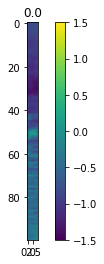

date:180325, rec:009, time:4641.0


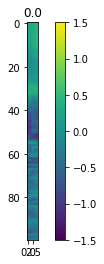

date:180325, rec:005, time:761.0


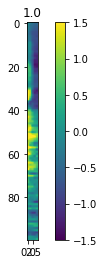

date:180325, rec:004, time:6887.0


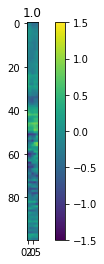

date:180323, rec:007, time:2106.0


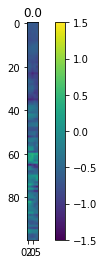

date:180325, rec:002, time:2219.0


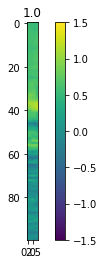

date:180324, rec:008, time:6036.0


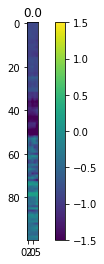

date:180323, rec:002, time:3966.0


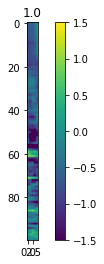

date:180324, rec:008, time:6066.0


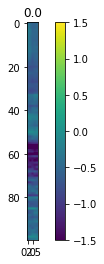

date:180324, rec:006, time:3626.0


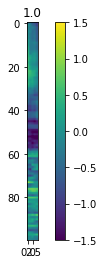

date:180322, rec:003, time:4576.0


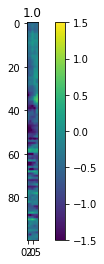

date:180324, rec:003, time:1198.0


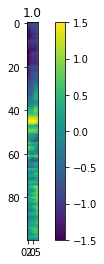

date:180325, rec:007, time:4740.0


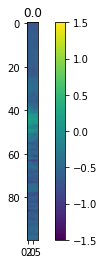

date:180325, rec:007, time:4685.0


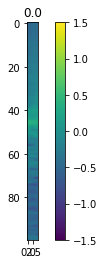

date:180324, rec:006, time:5710.0


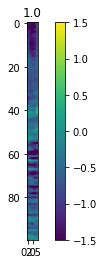

date:180322, rec:007, time:4342.0


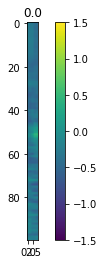

date:180324, rec:006, time:3496.0


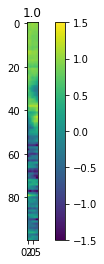

date:180324, rec:009, time:572.0


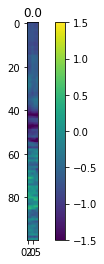

date:180401, rec:001, time:627.0


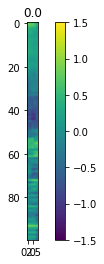

date:180323, rec:002, time:2143.0


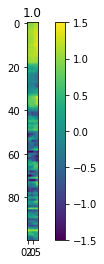

date:180325, rec:009, time:1367.0


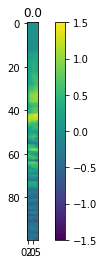

date:180324, rec:005, time:3101.0


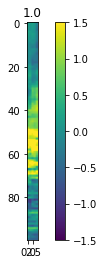

date:180325, rec:009, time:957.0


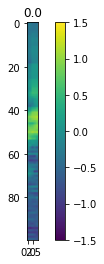

date:180325, rec:009, time:2507.0


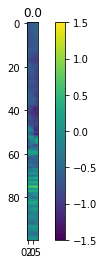

date:180322, rec:007, time:3992.0


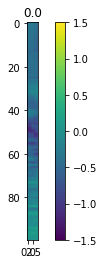

date:180324, rec:006, time:4470.0


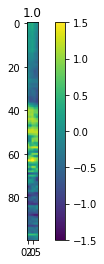

date:180324, rec:008, time:643.0


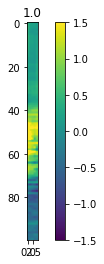

date:180325, rec:007, time:6105.0


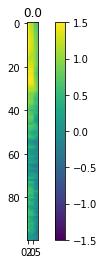

date:180323, rec:003, time:5093.0


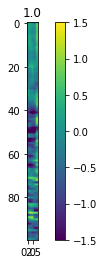

date:180325, rec:009, time:5542.0


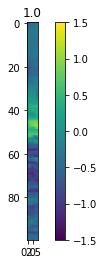

date:180325, rec:009, time:2307.0


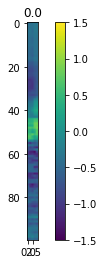

date:180325, rec:001, time:727.0


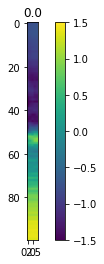

date:180324, rec:005, time:2192.0


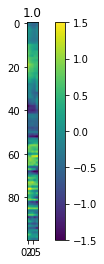

date:180325, rec:002, time:6851.0


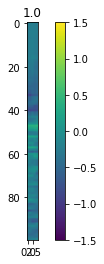

date:180324, rec:006, time:6670.0


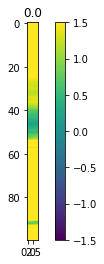

date:180322, rec:003, time:1180.0


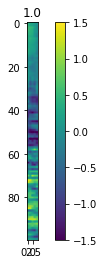

date:180324, rec:008, time:98.0


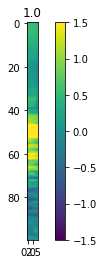

date:180324, rec:008, time:6951.0


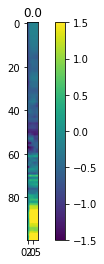

date:180325, rec:007, time:6325.0


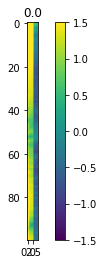

date:180325, rec:002, time:6906.0


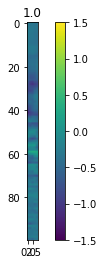

In [5]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [6]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
timewindow = 5

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [7]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5435292720794678
Val loss for epoch 0: 0.5117324590682983
Train loss for epoch 1: 0.5191679000854492
Val loss for epoch 1: 0.4919325113296509
1
Train loss for epoch 2: 0.5123997926712036
Val loss for epoch 2: 0.4663286805152893
2
Train loss for epoch 3: 0.5088013410568237
Val loss for epoch 3: 0.4648364186286926
3
Train loss for epoch 4: 0.5070688724517822
Val loss for epoch 4: 0.4605027139186859
4
Train loss for epoch 5: 0.5055451393127441
Val loss for epoch 5: 0.4567457437515259
5
Train loss for epoch 6: 0.5050767660140991
Val loss for epoch 6: 0.4484863877296448
6
Train loss for epoch 7: 0.5040316581726074
Val loss for epoch 7: 0.45302924513816833
Train loss for epoch 8: 0.50368732213974
Val loss for epoch 8: 0.43998485803604126
8
Train loss for epoch 9: 0.503089964389801
Val loss for epoch 9: 0.43794140219688416
9
Train loss for epoch 10: 0.5027865767478943
Val loss for epoch 10: 0.44395583868026733
Train loss for epoch 11: 0.5019077658653259
Val loss for 

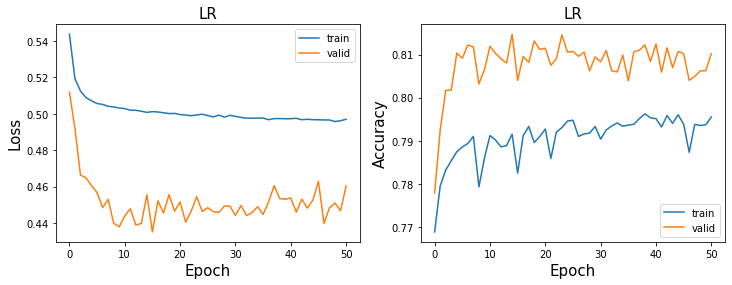

In [8]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [9]:
model = GLM(input_dim=100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [14]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.5747585296630859 accuracy:0.7312745394140743


In [15]:
np.mean(np.concatenate(test_labels))

0.73527634

In [16]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

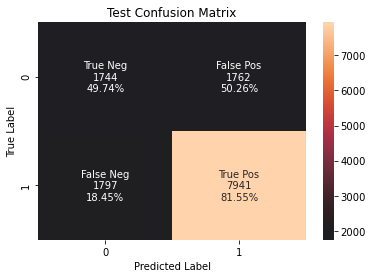

In [17]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

In [18]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

date:180330, rec:005, time:6084.0, label:1.0
Original data 62 CH


### Logistic regression with L2 regularization

In [19]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
timewindow = 5

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [20]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5426903367042542
Val loss for epoch 0: 0.5138036608695984
Train loss for epoch 1: 0.5197529196739197
Val loss for epoch 1: 0.48264965415000916
1
Train loss for epoch 2: 0.5136870741844177
Val loss for epoch 2: 0.4702068567276001
2
Train loss for epoch 3: 0.5096786022186279
Val loss for epoch 3: 0.46223074197769165
3
Train loss for epoch 4: 0.5074553489685059
Val loss for epoch 4: 0.4671114981174469
Train loss for epoch 5: 0.5066609382629395
Val loss for epoch 5: 0.461557000875473
5
Train loss for epoch 6: 0.5058542490005493
Val loss for epoch 6: 0.44791358709335327
6
Train loss for epoch 7: 0.5052849054336548
Val loss for epoch 7: 0.45112344622612
Train loss for epoch 8: 0.5050695538520813
Val loss for epoch 8: 0.44536301493644714
8
Train loss for epoch 9: 0.5045548677444458
Val loss for epoch 9: 0.4639560282230377
Train loss for epoch 10: 0.5035874247550964
Val loss for epoch 10: 0.44715267419815063
Train loss for epoch 11: 0.5034303665161133
Val loss for epo

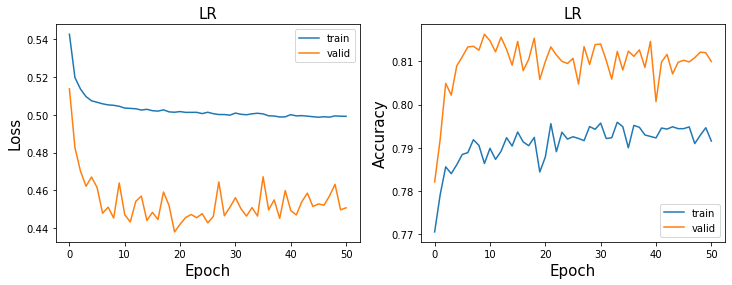

In [21]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [25]:
model = GLM(input_dim=100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [27]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.5814628601074219 accuracy:0.73180308064029


In [28]:
np.mean(np.concatenate(test_labels))

0.73527634

In [29]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

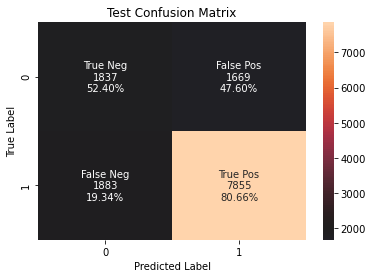

In [30]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

In [31]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

date:180330, rec:005, time:6084.0, label:1.0
Original data 62 CH


### Logistic Regression with finite difference regularization

In [32]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
timewindow = 5

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [33]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5425856709480286
Val loss for epoch 0: 0.5214845538139343
Train loss for epoch 1: 0.5208406448364258
Val loss for epoch 1: 0.48760396242141724
1
Train loss for epoch 2: 0.5144640207290649
Val loss for epoch 2: 0.4684511125087738
2
Train loss for epoch 3: 0.5099545121192932
Val loss for epoch 3: 0.4672227203845978
3
Train loss for epoch 4: 0.5078166723251343
Val loss for epoch 4: 0.45534655451774597
4
Train loss for epoch 5: 0.506901741027832
Val loss for epoch 5: 0.45567405223846436
Train loss for epoch 6: 0.5069997310638428
Val loss for epoch 6: 0.4550318717956543
6
Train loss for epoch 7: 0.5055701732635498
Val loss for epoch 7: 0.45328211784362793
7
Train loss for epoch 8: 0.5058274865150452
Val loss for epoch 8: 0.44400736689567566
8
Train loss for epoch 9: 0.5053715705871582
Val loss for epoch 9: 0.4624817371368408
Train loss for epoch 10: 0.5049468278884888
Val loss for epoch 10: 0.4513275623321533
Train loss for epoch 11: 0.5046735405921936
Val loss for

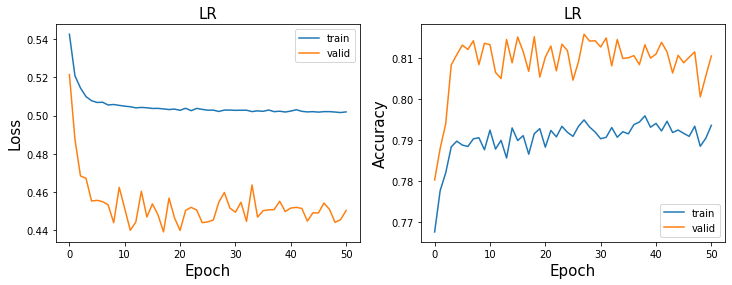

In [34]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [39]:
model = GLM(input_dim=100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [42]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.578295111656189 accuracy:0.7331621866505588


In [43]:
np.mean(np.concatenate(test_labels))

0.73527634

In [44]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

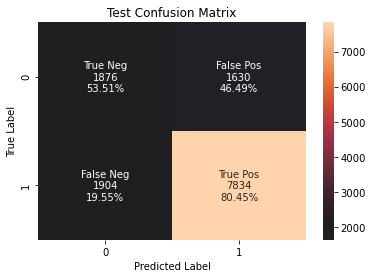

In [45]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

Done here. Not done w SVM. 

### SVM without regularization

### SVM with L2 regularization

In [15]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [26]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6851320862770081
Val loss for epoch 0: 0.7111771702766418
Train loss for epoch 1: 0.6442375183105469
Val loss for epoch 1: 0.7678999900817871
Train loss for epoch 2: 0.6391520500183105
Val loss for epoch 2: 0.7529788017272949
Train loss for epoch 3: 0.6417877078056335
Val loss for epoch 3: 0.6641672253608704
3
Train loss for epoch 4: 0.6390126347541809
Val loss for epoch 4: 0.6984342932701111
Train loss for epoch 5: 0.6404396295547485
Val loss for epoch 5: 0.7401537895202637
Train loss for epoch 6: 0.639179527759552
Val loss for epoch 6: 0.6993381977081299
Train loss for epoch 7: 0.6405513882637024
Val loss for epoch 7: 0.6649073362350464
Train loss for epoch 8: 0.6384839415550232
Val loss for epoch 8: 0.6716033816337585
Train loss for epoch 9: 0.6426579356193542
Val loss for epoch 9: 0.7246717214584351
Train loss for epoch 10: 0.6410369277000427
Val loss for epoch 10: 0.714557945728302
Train loss for epoch 11: 0.640546977519989
Val loss for epoch 11: 0.700012

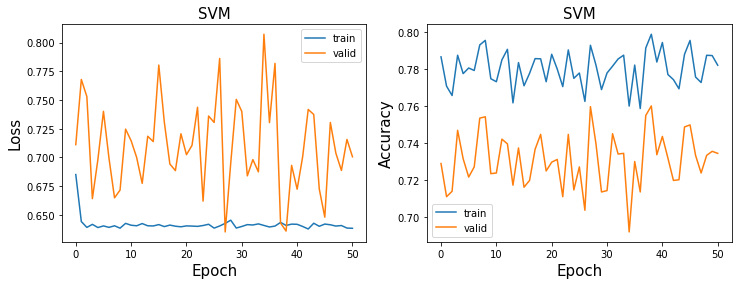

In [27]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [16]:
best_epoch = 27

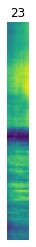

In [17]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [18]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.9384552836418152 accuracy:0.6475384615384615


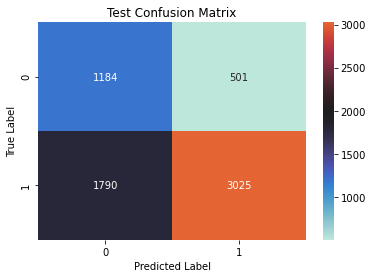

In [19]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


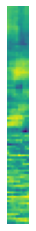

In [20]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_4[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [29]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6690675616264343
Val loss for epoch 0: 0.7053626179695129
Train loss for epoch 1: 0.579605758190155
Val loss for epoch 1: 0.6587177515029907
1
Train loss for epoch 2: 0.5777973532676697
Val loss for epoch 2: 0.661455512046814
Train loss for epoch 3: 0.5772103071212769
Val loss for epoch 3: 0.6873345375061035
Train loss for epoch 4: 0.5797932744026184
Val loss for epoch 4: 0.6312553286552429
4
Train loss for epoch 5: 0.5747454762458801
Val loss for epoch 5: 0.6387228965759277
Train loss for epoch 6: 0.5753779411315918
Val loss for epoch 6: 0.6457529067993164
Train loss for epoch 7: 0.5756300687789917
Val loss for epoch 7: 0.570262610912323
7
Train loss for epoch 8: 0.5766920447349548
Val loss for epoch 8: 0.6651206016540527
Train loss for epoch 9: 0.5784576535224915
Val loss for epoch 9: 0.6457962989807129
Train loss for epoch 10: 0.5766485929489136
Val loss for epoch 10: 0.6799610257148743
Train loss for epoch 11: 0.577312171459198
Val loss for epoch 11: 0.635

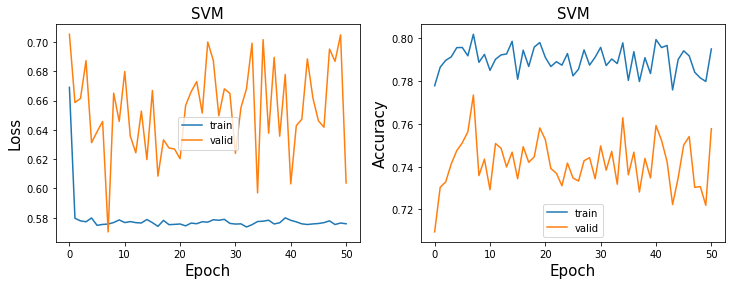

In [30]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [22]:
best_epoch = 7

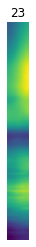

In [23]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [24]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8175214529037476 accuracy:0.6916923076923077


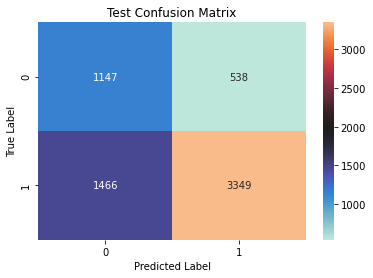

In [25]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


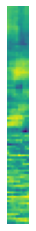

In [26]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_5[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()